$\newcommand{\Sum}{\sum\limits}
\newcommand{\Int}{\int\limits}
\newcommand{\Intf}{\int\limits_{-\infty}^{+\infty}}
\newcommand{\Prod}{\prod\limits}
\newcommand{\Max}{\max\limits}
\newcommand{\Min}{\min\limits}
\newcommand{\Lim}{\lim\limits}
\newcommand{\Var}{\mathbb{V}}
\newcommand{\Exp}{\mathbb{E}}
\newcommand{\argmax}{\arg\max}
\newcommand{\Cov}{\text{Cov}}
\newcommand{\makebold}[1]{\boldsymbol{#1}}
\newcommand{\eps}{\varepsilon}
\newcommand{\mean}[1]{\overline{#1}}
\newcommand{\avg}[1]{\langle #1 \rangle}
\newcommand{\angmean}[1]{\langle #1 \rangle}
\newcommand{\Prob}{\mathcal{P}}
\newcommand{\se}{\text{se}}
\newcommand{\lp}{\left}
\newcommand{\rp}{\right}
\newcommand{\boldx}{\boldsymbol{x}}
\newcommand{\boldy}{\boldsymbol{y}}
\newcommand{\boldz}{\boldsymbol{z}}
\newcommand{\boldX}{\boldsymbol{X}}
\newcommand{\boldY}{\boldsymbol{Y}}
\newcommand{\boldZ}{\boldsymbol{Z}}
\newcommand{\Poisson}{\mathrm{Poisson}}
\newcommand{\Triangle}{\mathrm{Triangle}}
\newcommand{\Uniform}{\mathrm{Uniform}}
\newcommand{\Binomial}{\mathrm{Binomial}}
\newcommand{\Bernoulli}{\mathrm{Bernoulli}}
\newcommand{\Gammap}{\mathrm{Gamma}}
\newcommand{\Normal}{\mathcal{N}}
\newcommand{\LogN}{\mathrm{LogN}}
\newcommand{\Exponential}{\mathrm{Exp}}
\newcommand{\Erlang}{\mathrm{Erlang}}
\newcommand{\Cauchy}{C}
\newcommand{\Dir}{\mathrm{Dir}}
\newcommand{\Beta}{\mathrm{Beta}}
\newcommand{\Pareto}{\mathrm{Pareto}}
\newcommand{\lf}{\left\{}
\newcommand{\rf}{\right\}}
\newcommand{\lp}{\left(}
\newcommand{\rp}{\right)}
\newcommand{\Ecdf}[1]{\hat{F}_n(#1)}
\newcommand{\OPT}{\text{OPT}}
\newcommand{\opt}{\text{opt}}
\newcommand{\boot}{\text{boot}}
\newcommand{\bias}{\text{bias}}
\newcommand{\se}{\text{se}}
\newcommand{\MSE}{\text{MSE}}
\newcommand{\qm}{\text{qm}}
\newcommand{\as}{\text{as}}
\newcommand{\trace}{\text{trace}}
\newcommand{\esttheta}{\hat{\theta}}
\newcommand{\estlambda}{\hat{\lambda}}
\newcommand{\estmu}{\hat{\mu}}
\newcommand{\estsigma}{\hat{\sigma}}
\newcommand{\estalpha}{\hat{\alpha}}
\newcommand{\estbeta}{\hat{\beta}}
\newcommand{\estxi}{\hat{\xi}}
\newcommand{\esttau}{\hat{\tau}}
\newcommand{\estpsi}{\hat{\psi}}
\newcommand{\esta}{\hat{a}}
\newcommand{\estb}{\hat{b}}
\newcommand{\estc}{\hat{c}}
\newcommand{\estd}{\hat{d}}
\newcommand{\estp}{\hat{p}}
\newcommand{\estT}{\hat{T}}
\newcommand{\estR}{\hat{R}}
\newcommand{\estF}{\hat{F}}
\newcommand{\estf}{\hat{f}}
\newcommand{\estC}{\hat{C}}
\newcommand{\estS}{\hat{S}}
\newcommand{\estY}{\hat{Y}}
\newcommand{\esty}{\hat{y}}
\newcommand{\estVar}{\hat{\Var}}
\newcommand{\estExp}{\hat{\Exp}}
\newcommand{\estSe}{\hat{\se}}
\newcommand{\hatp}{\hat{p}}
\newcommand{\hatF}{\hat{F}}
\newcommand{\hatT}{\hat{T}}
\newcommand{\hattheta}{\hat{\theta}}
\newcommand{\hatse}{\hat{\se}}$

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

<a id='toc'></a>
# Содержание
* [Задача 5](#task5)
* [Задача 6](#task6)
* [Задача 7](#task7)
* [Задача 9](#task9)

<a id='task5'></a>
## Задача 5<sup>[содержание](#toc)</sup>

Скачайте данные о качестве красных вин. Постройте график для $\hatF(x; \boldx^n)$ для уровня кислотности (pH). Для каждой точки $x$ постройте:
* 95%-ый доверительный интервал на основе неравенства Дворецкого-Кифера-Вольфовица.
* Асимптотический нормальный 95%-ый доверительный интервал для значения $F(x)$.
По значениям уровня кислотности $\boldx^n$ подсчитайте оценку $T(\boldx^n)$ для функционала $T(F) = F(3.5) − F(3.4)$ и оцените аналитически стандартное отклонение $\hatse$ оценки $T(\boldx^n)$. Постройте асимптотический нормальный 95%-ый доверительный интервал для $T(F)$.

In [2]:
phs = pd.read_csv(os.path.join(os.curdir, 'winequality-red.csv'), sep=';')
X = phs['pH'].values
LEFT = 3.4
RIGHT = 3.5
print('Number of samples: {}'.format(X.shape))
print('Min value: {}'.format(X.min()))
print('Max value: {}'.format(X.max()))

Number of samples: (1599,)
Min value: 2.74
Max value: 4.01


In [3]:
X = np.sort(X)
n = len(X)
probs = np.arange(n) / n

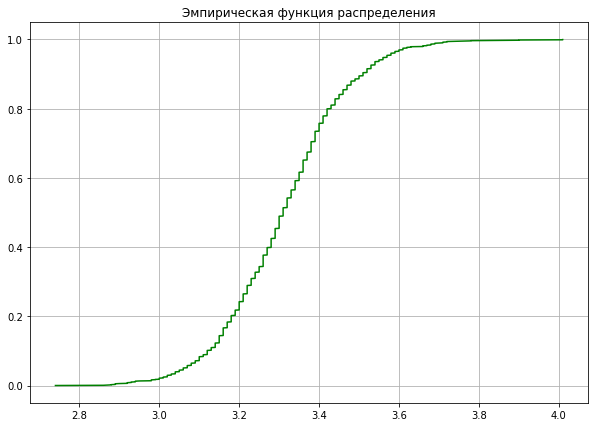

In [4]:
plt.figure(figsize=(10,7))
plt.plot(X, probs, 'g')
plt.title('Эмпирическая функция распределения')
plt.grid()
plt.show()

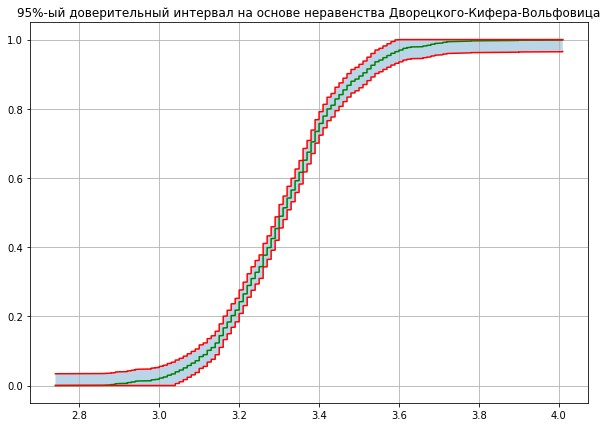

In [5]:
alpha = 0.05
eps = np.sqrt(np.log(2 / alpha) / (2 * n))

probs_right = np.array(probs) + eps
probs_right[probs_right > 1.] = 1

probs_left = np.array(probs) - eps
probs_left[probs_left < 0.] = 0.

plt.figure(figsize=(10,7))
plt.plot(X, probs, 'g')
plt.plot(X, probs_left, 'r')
plt.plot(X, probs_right, 'r')
plt.fill_between(X, probs_left, probs_right, alpha=0.3)
plt.title('95%-ый доверительный интервал на основе неравенства Дворецкого-Кифера-Вольфовица')
plt.grid()
plt.show()

Для построения асимптотически нормального интервала нужно найти математическое ожидание и  среднеквадратическое отклонение для оценки функции распределения F: $\Exp{\hat{F}} = F, \quad \Var\hat{F} = \frac{F(1-F)}{n}, \quad se{\hat{F}} = \sqrt{\Var\hat{F}}$

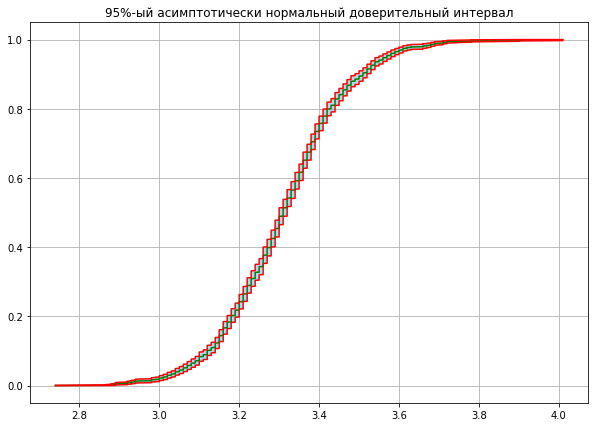

In [6]:
standart_error = np.sqrt(probs * (1 - probs) / n)
eps = stats.norm.ppf(1 - alpha / 2) * standart_error

probs_right = np.array(probs) + eps
probs_right[probs_right > 1.] = 1

probs_left = np.array(probs) - eps
probs_left[probs_left < 0.] = 0.

plt.figure(figsize=(10,7))
plt.plot(X, probs, 'g')
plt.plot(X, probs_left, 'r')
plt.plot(X, probs_right, 'r')
plt.fill_between(X, probs_left, probs_right, alpha=0.3)
plt.title('95%-ый асимптотически нормальный доверительный интервал')
plt.grid()
plt.show()

Найдем оценку для T(F) = F(3.5) - F(3.4) и его оценку стандартного отклонения (формула выведена в 4 задаче)

In [7]:
def get_ecdf(X, x):
    return (X <= x).sum() / len(X)

def get_se(f):
    return np.sqrt(f * (1 - f) / n)

T = get_ecdf(X, 3.5) - get_ecdf(X, 3.4)
se = get_se(T)
print("Оценка для T(F):", T)
print("Оценка для se:", se)

Оценка для T(F): 0.1369606003752346
Оценка для se: 0.008597831013481914


In [8]:
eps = stats.norm.ppf(1 - alpha / 2) * se
print("95% доверительный интервал для Т:", T - eps, T + eps)

95% доверительный интервал для Т: 0.12010916124364854 0.15381203950682068


<a id='task6'></a>
## Задача 6<sup>[содержание](#toc)</sup>

В процессе очистки питьевой воды выпадает значительный осадок. Для его уменьшения можно воздействовать на разные факторы,
в т.ч. на количество микроорганизмов в жидкости, способствующих окислению органики. В группу из $261$ очистительных установок
был добавлен реагент, подавляющих активность микроорганизмов, а состав остальных $119$ остался без изменений.
Пусть $\theta$ &mdash; разность в средних значениях количества твердых частиц в этих двух группах установок.
Оценить по данным **WaterTreatment** величину $\theta$, оценить стандартную ошибку оценки, построить
$95\%$ и $99\%$ доверительные интервалы. Какие выводы можно сделать на основе полученных результатов?

In [9]:
data = pd.read_csv(os.path.join(os.curdir, "WaterTreatment.csv"))
DATA_LABEL = 'sediment'
first_group = data[DATA_LABEL][data['reduced_microorganism'] == 1].values
second_group = data[DATA_LABEL][data['reduced_microorganism'] == 0].values
print('First group size: {}'.format(first_group.shape[0]))
print('Second group size: {}'.format(second_group.shape[0]))

First group size: 261
Second group size: 119


In [10]:
def get_mean(X):
    return np.array(X).mean()

def get_variance(X):
    return np.array(X).var() / len(X)

Оценка стандартного отклонения будет следующая:  
$\hat{se} = \sqrt{V\theta} = \sqrt{V(\theta_1-\theta_2)} = \sqrt{V\theta_1 + V\theta_2}$, где $\theta_1$ - среднее значение sediment для первой группы, а $\theta_2$ - второй.

In [11]:
first_mean = get_mean(first_group)
first_variance = get_variance(first_group)

second_mean = get_mean(second_group)
second_variance = get_variance(second_group)

theta = first_mean - second_mean
theta_se = np.sqrt(first_variance + second_variance)
print("Оценка theta:", theta)
print("Оценка стандартного отклонения:", theta_se)

Оценка theta: -0.07133294697189219
Оценка стандартной ошибки оцнеки: 0.03225939884320162


In [12]:
def get_interval(theta, se, alpha):
    eps = stats.norm.ppf(1 - alpha / 2) * se
    return theta - eps, theta + eps

print("95% доверительный интервал: ", get_interval(theta, theta_se, 0.05))
print("99% доверительный интервал: ", get_interval(theta, theta_se, 0.01))

95% доверительный интервал:  (-0.13456020686748044, -0.008105687076303922)
99% доверительный интервал:  (-0.1544276518270824, 0.011761757883298044)


1) В 95% доверительный интервал не входит 0, это значит, что гипотеза о том, что добавление реагента влияет на жесткость жидкости, может быть принята на уровне значимости 95%.  
2) В 99% доверительный интервал входит 0, это значит, что по имеющимся данным мы не можем что-то утверждать со значимостью 99%.

<a id='task7'></a>
## Задача 7<sup>[содержание](#toc)</sup>

Провести моделирование, чтобы сравнить различные типы доверительных интервалов, построенных с помощью бутстрепа. Пусть $n = 50$, $T(F) = {\int\lp x-\mu\rp^3dF(x)} / \sigma^{3}$ &mdash; коэффициент асимметрии, где $F$ &mdash; логнормальное распределение. Постройте 95\% доверительные интервалы для $T(F)$ (под $F$ понимается распределение элементов выборки $X_1,\ldots,X_n$) по данным $\boldX^n = \{X_1,\ldots,X_n\}$, используя три подхода на основе бутстрепа.

Выборку из логнормального распределения можно сгенерировать из нормального, сначала сгенерировав выборку н.о.р. величин $\boldY^n = \{Y_1, \ldots,Y_n\} \sim \Normal(0,1)$, после чего положив $X_i = e^{Y_i}$, $i = 1,2,\ldots,n$.

In [13]:
Y = np.random.normal(loc=0, scale=1, size=50)
X = np.exp(Y)

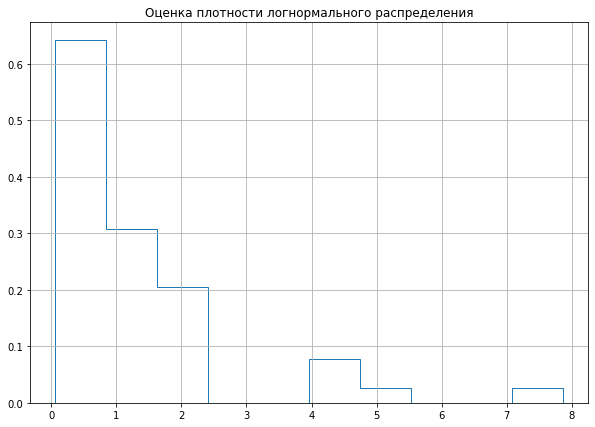

In [14]:
plt.figure(figsize=(10,7))
plt.hist(X, bins=10, density=True, histtype='step')
plt.title('Оценка плотности логнормального распределения')
plt.grid()
plt.show()

In [15]:
skewness = ((X - np.mean(X)) ** 3).mean() / np.std(X) ** 3
print("Оценка коэффициента ассиметрии для выборки:", skewness)

Оценка коэффициента ассиметрии для выборки: 2.4684554408057147


In [16]:
n = len(X)
B = 10000

In [17]:
xb = np.random.choice(X, (n, B), replace=True)

In [18]:
mean = xb.mean(axis=0)
se = xb.std(axis=0)
Tn = ((xb - mean) ** 3 / se ** 3).mean(axis=0)

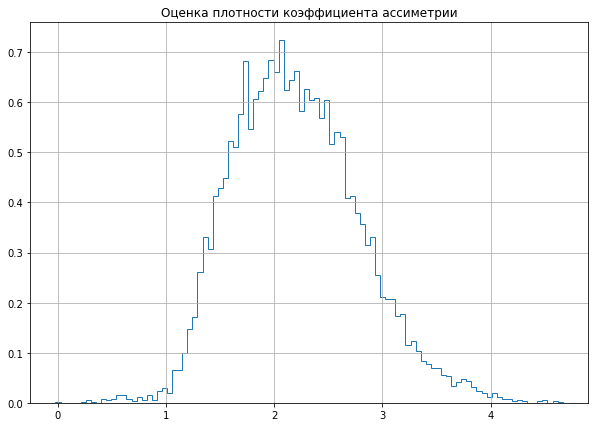

In [19]:
plt.figure(figsize=(10,7))
plt.hist(Tn, bins=100, density=True, histtype='step')
plt.title('Оценка плотности коэффициента ассиметрии')
plt.grid()
plt.show()

In [20]:
mean_boots = np.mean(Tn)
se_boots = np.std(Tn)

#### Построение 95% доверительных интервалов

##### Нормальный интервал

In [21]:
alpha = 0.05
eps = stats.norm.ppf(1 - alpha / 2) * se_boots
print("95% нормальный интервал: ", get_interval(skewness, se_boots, alpha))

95% нормальный интервал:  (1.3217514532561798, 3.6151594283552493)


##### Центральный интервал
$$(2\hat{T} - \hat{T}_{1 - \alpha / 2}^{*}, 2\hat{T} - \hat{T}_{\alpha / 2}^{*})$$

In [22]:
alpha = 0.05
lower, upper = np.percentile(Tn, [100 * alpha / 2, 100 * (1 - alpha / 2)])
print("95% центральный интервал: ", (2 * skewness - upper, 2 * skewness - lower))

95% центральный интервал:  (1.4582266514199205, 3.7012385971267285)


##### Интервал на основе процентилей
$$(\hat{T}_{\alpha / 2}^{*}, \hat{T}_{1 - \alpha / 2}^{*})$$

In [23]:
print("95% интервал на основе процентилей: ", (lower, upper))

95% интервал на основе процентилей:  (1.2356722844847008, 3.478684230191509)


<a id='task9'></a>
## Задача 9<sup>[содержание](#toc)</sup>

Пусть $\boldX^n = \{X_1,\ldots, X_n\} \sim \Normal(\mu, 1)$, $\theta = e^{\mu}$ и $\esttheta = e^{\angmean{\boldX^n}}$. 
Сгенерируйте выборку $\boldX^n$ из $n = 100$ наблюдений для $\mu = 10$.
Нарисуйте гистограмму  значений $\{\esttheta^*_i\}_{i=1}^B$ бутстрепных оценок. Эта гистограмма является оценкой распределения $p_{\esttheta}(x)$. Сравните ее с настоящим распределением $p_{\esttheta}(x)$.
Используя бутстреп, подсчитайте величину $\se$ и постройте тремя способами $95\%$ доверительный интервал для $\theta$.

In [33]:
mu = 10
sigma = 1
n = 100
X = np.random.normal(loc=mu, scale=1, size=n)

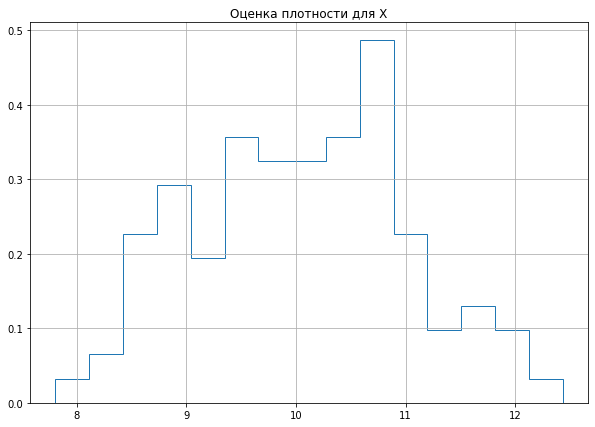

In [34]:
plt.figure(figsize=(10,7))
plt.title('Оценка плотности для X')
plt.hist(X, bins=15, density=True, histtype='step')
plt.grid()
plt.show()

In [35]:
def true_density(x, mu, sigma):
    exp_ = np.exp(-(n * np.log(x) - n * mu)**2 / (2 * n * (sigma ** 2)))
    return exp_ * n / (x * np.sqrt(2 * np.pi * n * (sigma ** 2)))

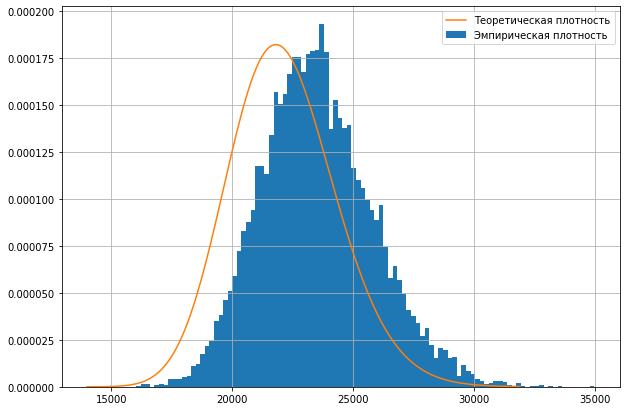

In [36]:
B = 10000
xb = np.random.choice(X, (n, B), replace=True)

Tn = np.exp(np.mean(xb, axis=0))

x = np.arange(14000, 32000, 100)
dens = true_density(x, mu, sigma)

plt.figure(figsize=(10,7))
plt.hist(Tn, bins=100, density=True, label='Эмпирическая плотность')
plt.plot(x, dens, label='Теоретическая плотность')
plt.legend()
plt.grid()
plt.show()

In [37]:
print("Оценка для theta: ", np.exp(np.mean(X)))

Оценка для theta:  23396.14003268275


На графике видно, что бутстрепное распределение для исслеуемой оценки смещено относительно теоретической плотности.

In [38]:
se_boots = np.std(Tn)
print("Оценка стандартного отклоения для theta:", se_boots)

Оценка стандартного отклоения для theta: 2328.1500210578297


#### Построение 95% доверительных интервалов для $\theta$

##### Нормальный интервал

In [39]:
T = np.exp(np.mean(X))

alpha = 0.05
print("95% нормальный интервал: ", get_interval(T, se_boots, alpha))

95% нормальный интервал:  (18833.049840803236, 27959.230224562263)


##### Центральный интервал
$$(2\hat{T} - \hat{T}_{1 - \alpha / 2}^{*}, 2\hat{T} - \hat{T}_{\alpha / 2}^{*})$$

In [40]:
alpha = 0.05
lower, upper = np.percentile(Tn, [100 * alpha / 2, 100 * (1 - alpha / 2)])
print("95% центральный интервал: ", (2 * T - upper, 2 * T - lower))

95% центральный интервал:  (18281.11973543775, 27434.206835373403)


##### Интервал на основе процентилей
$$(\hat{T}_{\alpha / 2}^{*}, \hat{T}_{1 - \alpha / 2}^{*})$$

In [41]:
print("95% интервал на основе процентилей: ", (lower, upper))

95% интервал на основе процентилей:  (19358.073229992096, 28511.16032992775)
